<a href="https://colab.research.google.com/github/seshadrite/aimlexercises/blob/main/exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Load the CSV file from GitHub
import pandas as pd
import requests
import io
github_csv_url = "https://raw.githubusercontent.com/seshadrite/aimlexercises/main/exercise1.csv"
try:
    response = requests.get(github_csv_url)
    response.raise_for_status()  # Raise an HTTPError for bad responses (4xx or 5xx)

    # Read the content into a pandas DataFrame
    df = pd.read_csv(io.StringIO(response.text))

    print("CSV loaded successfully!")
    print(df.head())
except requests.exceptions.RequestException as e:
    print(f"Error fetching the CSV file: {e}")
    print("Please ensure the URL is correct and accessible.")
except pd.errors.EmptyDataError:
    print("Error: No data to parse. The CSV file might be empty.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

CSV loaded successfully!
   Experience (yrs)  Training Hours  Working Hours  Projects  \
0                 2              40             38         3   
1                 5              60             42         6   
2                 1              20             35         2   
3                 8              80             45         8   
4                 4              50             40         5   

   Productivity Score  
0                  62  
1                  78  
2                  55  
3                  88  
4                  72  


In [7]:
# •	Which factor most strongly impacts productivity?

correlation_matrix = df.corr()
productivity_correlations = correlation_matrix['Productivity Score']

# Drop self-correlation
productivity_correlations = productivity_correlations.drop('Productivity Score')

# Get column with highest correlation
max_feature = productivity_correlations.idxmax()
max_value = productivity_correlations.max()

print(f"Highest correlated feature: {max_feature}")
print(f"Correlation value: {max_value}")

Highest correlated feature: Projects
Correlation value: 0.9956956788596761


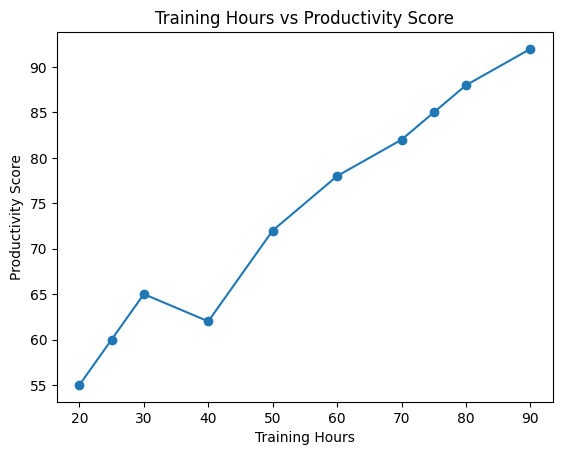

In [11]:
#	How does training affect productivity?
import matplotlib.pyplot as plt

training_hours_sorted, productivity_sorted = zip(
    *sorted(zip(df['Training Hours'], df['Productivity Score']))
)
# Plot line graph
plt.figure()
plt.plot(training_hours_sorted, productivity_sorted, marker='o')
plt.xlabel("Training Hours")
plt.ylabel("Productivity Score")
plt.title("Training Hours vs Productivity Score")
plt.show()

# As per the plot Training has a positive impact with producitivity overall, except for the duration between 30-40.



